In [1]:
#
# Read in api key for (newsapi-python) newsapi.org and set global variable
# #--> pip install newsapi-python
#

import requests
import json
from contextlib import closing

# get API key for newsapi.org
APIKEY_FILE = '../newsapi_key.txt'

def read_api_key(api_key_fname):
    """
        read in api key from file. relative path, file just contains api key. return key as string
    """
    with open(api_key_fname) as f:
        api_key = f.read()
    
    return api_key

api_key = read_api_key(APIKEY_FILE)

In [2]:
# Initilize NewsApiClient using api key
# using python package newsapi-python
#--> pip install newsapi-python
from newsapi import NewsApiClient

# Init
newsapi = NewsApiClient(api_key=api_key)

In [3]:
# Available sources
# get sources from NewsApiClient/newsapi.org
sources_response = newsapi.get_sources()
assert sources_response['status'] == 'ok'

# create a name:id python dictonary / map. The ids can be used for requests to NewsApiClient
name_id_dict = {s['name']:s['id'] for s in sources_response['sources']}
# creat a id:name dictonary
id_name_dict = {v: k for k, v in name_id_dict.items()}

# create a pandas dataframe from this dictonary with id as first column
import pandas as pd

id_name_df = pd.DataFrame.from_dict(data=id_name_dict, orient='index', columns=['name'])
id_name_df.index.name = 'id'
id_name_df

,name
id,
abc-news,ABC News
abc-news-au,ABC News (AU)
aftenposten,Aftenposten
al-jazeera-english,Al Jazeera English
ansa,ANSA.it
argaam,Argaam
ars-technica,Ars Technica
ary-news,Ary News
associated-press,Associated Press


In [4]:
"""
Article Scraper from a given url

requirements: 
	-Newspaper3k, https://github.com/codelucas/newspaper, http://newspaper.readthedocs.io/en/latest/, https://newsapi.org/docs/client-libraries/python
    --> pip install newspaper3k
Notes: 	
	newspaper offers nlp summary
	article.nlp()
	print(article.summary)

"""
# external
from newspaper import Article

def get_full_article(url):
    # does not work for video news sources etc
    article = Article(url)
    article.download()
    article.parse()
    text = article.text
    if len(text) < 10:
        print("warning with article url when extracting full text. Function: get_full_article")
        return None
    return text

# testing
test_article_url = "http://www.foxnews.com/world/2018/08/28/likely-lula-replacement-denies-corruption-charges-in-brazil.html"
print(get_full_article(test_article_url))

next

prev

The man in line to replace jailed presidential candidate Luiz Inacio Lula da Silva as the Brazilian Workers' Party standard-bearer on Tuesday denied accusations of corruption.

Prosecutors accuse Fernando Haddad of receiving indirect payments to his 2012 campaign for Sao Paulo mayor.

Construction company UTC Engenharia got preferential treatment on bids after covering about US$1.6 million of debt associated with Haddad's campaign, according to a former accusation filed Monday. Although Haddad did not request payment directly, he had full control over the scheme, according to prosecutors.

On Tuesday, Haddad responded while campaigning in Rio de Janeiro. He said that he cancelled a multimillion dollar project with a company belonging to the UTC group after an employee alerted him that the company was overcharging the government.

"How is it that a mayor who cancels a corrupt construction project gets put through this instead of being thanked for saving the city tens of mill

In [5]:
# get list of article objects from response from newsapi.org
#--> pip install newsapi-python
#from newsapi import NewsApiClient
#-Newspaper3k, https://github.com/codelucas/newspaper, http://newspaper.readthedocs.io/en/latest/, https://newsapi.org/docs/client-libraries/python
#--> pip install newspaper3k

def get_list_of_article_objects(newsapi_article_response, include_full_articles=True):
    """ given a article response from NewsApiClient return a list of article objects including the source id, title description url and if requested the full text of the article"""
    
    # get array of article json objects/list
    articles = newsapi_article_response['articles']
    
    # for article in articles look at 'source', 'title', 'description', 'url'
    # extract article sources titles descriptions and links to urls of actual articles
    article_objects = []
    for a in articles:
        
        article_object = {
            'news_source_id' : a['source']['id'], # article news source id
            'title' : a['title'], # article title 
            'description' : a['description'], # breif article description
            'url' : a['url'], # full article url
        }
        
        if include_full_articles:
            article_object['text'] = get_full_article(a['url']) # get full article text using Newspaper3k -- often None
        
        if None not in article_object.values():
            article_objects.append(article_object)
        
    return article_objects

In [6]:
# or by using python package
# -- https://github.com/mattlisiv/newsapi-python
#--> pip install newsapi-python
#from newsapi import NewsApiClient

def get_all_articles(source_id, api_key, max_articles=500, include_full_article_text=True):
    
    # init
    newsapi = NewsApiClient(api_key=api_key)
    
    print(source_id)
    
    all_article_objects = []
    page_number = 1
    
    while len(all_article_objects) < max_articles:
        page_number = page_number + 1
        response = newsapi.get_everything(sources=source_id,
                                      language='en',
                                      page=page_number, # can also use dates
                                        page_size=100) # 100 is maximum page size
    
        assert response['status'] == 'ok'
        
        all_article_objects += get_list_of_article_objects(response, include_full_articles=include_full_article_text)
        print("number of articles collected: %s" % len(all_article_objects[:max_articles]))
        
    return all_article_objects[:max_articles]
        
#
# Testing
#

# source
#selected_source_id = name_id_dict['Fox News']
    
# number of documents
#num_documents = 50

# example -- set include full article text to True for scrapping the actual site
#all_article_objects = get_all_articles(selected_source_id, api_key, max_articles=num_documents, include_full_article_text=False)



In [7]:
# turn list of article objects into single giant corpus

def article_objects_to_single_document_strings(article_objects):
    """combines title, description and text of all articles into single string"""
    
    concatinated_article_objects = []
    for ao in article_objects:
        article_string = ' '
        title = ao['title']
        description = ao['description']
        text = ''
        if 'text' in ao:
            text = ao['text']
            if text == None:
                text = ''
                
        article_string += title + '. ' + description + '. ' + text + '. '
        concatinated_article_object = {
            'id' : ao['news_source_id'],
            'article_string' : article_string
        }
        concatinated_article_objects.append(concatinated_article_object)
    
    return concatinated_article_objects
        
#
# Testing
#

# source
#selected_source_id = name_id_dict['Fox News']
    
# number of documents
#num_documents = 50

# example -- set include full article text to True for scrapping the actual site
#all_article_objects = get_all_articles(selected_source_id, api_key, max_articles=num_documents, include_full_article_text=True)

#simple_article_objects = article_objects_to_single_document_strings(all_article_objects)
#simple_article_objects


In [8]:
#
# Selected sources and bias labels (conservative, nuetral, liberal)
# 
# Selected sources 'Breitbart News', 'Fox News', 'Reuters', 'MSNBC', and 'CNN' - (conservative, conservative, neutral, liberal, liberal)
#
selected_source_ids = ['cnn', 'msnbc', 'reuters', 'fox-news', 'breitbart-news']

# bias labels python dictonary
id_bias_dict = {
    'cnn' : 'liberal',
    'msnbc' : 'liberal',
    'reuters' : 'neutral',
    'fox-news' : 'conservative',
    'breitbart-news' : 'conservative'
}

id_bias_dict

# pandas data frame version
id_bias_df = pd.DataFrame.from_dict(data=id_bias_dict, orient='index', columns=['bias'])
id_bias_df.index.name = 'id'
id_bias_df

# join name id dataframe and bias id dataframe
selected_news_sources_df = pd.merge(id_name_df, id_bias_df, on='id')
selected_news_sources_df

,name,bias
id,,
breitbart-news,Breitbart News,conservative
cnn,CNN,liberal
fox-news,Fox News,conservative
msnbc,MSNBC,liberal
reuters,Reuters,neutral


In [9]:
#
# scrape from selected sources
#
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# sources
selected_source_ids = list(selected_news_sources_df.index.values)
    
# number of documents
num_documents_per_source = 50

def scrape_from_sources_bag_of_words(api_key, selected_source_ids, num_documents_per_source):
    
 
    frames = []
   
    for sid in selected_source_ids:
        
        #set include full article text to True for scrapping the actual site
        all_article_objects = get_all_articles(sid, api_key, max_articles=num_documents_per_source, include_full_article_text=False)

        simple_article_objects = article_objects_to_single_document_strings(all_article_objects)
        source_articles = [x['article_string'] for x in simple_article_objects]

        #count_vect = CountVectorizer()
        #bag_words = count_vect.fit_transform(source_articles)
        count_vect = CountVectorizer(input=source_articles, stop_words='english', lowercase=True, max_df=0.4,min_df=0.001)
        count_vect.fit_transform(source_articles)
        
        # tf-idf
        tfidf_vect = TfidfVectorizer(input=source_articles, stop_words='english', lowercase=True, max_df=0.75,min_df=0.005) # an object capable of counting words in a document!
        tfidf_vect.fit_transform(source_articles)

        #encoded  tf-idf representation.  And create a pandas API out of this at the same time
        #corpus_tfidf_mat = tfidf_vect.fit_transform(source_articles)
        #corpus_tfidf_df = pd.DataFrame(data=corpus_tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names()) #store as df
        vocab_dict = {'term':list(tfidf_vect.vocabulary_.keys()), 'frequency': list(tfidf_vect.vocabulary_.values())}
        vocab_df = pd.DataFrame.from_dict(vocab_dict)
        
        #print(corpus_tfidf_df)
        
        #vocab_dict = {'term':list(count_vect.vocabulary_.keys()), 'frequency': list(count_vect.vocabulary_.values())}
        #vocab_df = pd.DataFrame.from_dict(vocab_dict)

        vocab_df['id'] = sid
        
        
        frames.append(vocab_df)
    
    #source_id_vocab_df = pd.concat(frames)
    source_id_vocab_df = pd.concat(frames, ignore_index=True)
    
    
    return source_id_vocab_df
    

# scrape from all selected sources and store as term frequency id in panda dataframe
sources_bag_of_words_df = scrape_from_sources_bag_of_words(api_key, selected_source_ids, num_documents_per_source)

sources_bag_of_words_df


breitbart-news
number of articles collected: 50
cnn
number of articles collected: 50
fox-news
number of articles collected: 50
msnbc
number of articles collected: 50
reuters
number of articles collected: 50


,term,frequency,id
0,watch,713,breitbart-news
1,actress,16,breitbart-news
2,piper,489,breitbart-news
3,perabo,485,breitbart-news
4,arrested,61,breitbart-news
5,brett,103,breitbart-news
6,kavanaugh,375,breitbart-news
7,hearing,308,breitbart-news
8,protesting,524,breitbart-news
9,supreme,651,breitbart-news


In [ ]:
# print out n most common words by source
n = 10
df_grouped = sources_bag_of_words_df.groupby(by='id')
for sid,grp in df_grouped:

    top_words = grp.sort_values(by='frequency')[-n:]
    print('\nTop %s words in %s source.' % (n, sid))
    print(top_words)

In [ ]:
# get occurences of term from each source, if source does not appear it is 0
query = 'alien'
query_info_df = sources_bag_of_words_df.loc[sources_bag_of_words_df['term'] == query]
query_info_df = query_info_df.set_index('id')
query_info_df

In [ ]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings

plt.style.use('ggplot')

fig = plt.figure(figsize=(14,10))


query_info_df[['frequency']]
query_info_df[['frequency']].plot(kind='barh')

plt.title('Word Frequency of \'%s\' by news source. (Not shown implies no mention)' % query)

plt.show()



In [14]:
#
# scrape from selected sources
#
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# sources
selected_source_ids = list(selected_news_sources_df.index.values)
    
# number of documents
num_documents_per_source = 50

def scrape_from_source(api_key, selected_source_id, num_documents_per_source):
    

    #set include full article text to True for scrapping the actual site
    all_article_objects = get_all_articles(selected_source_id, api_key, max_articles=num_documents_per_source, include_full_article_text=False)

    simple_article_objects = article_objects_to_single_document_strings(all_article_objects)
    source_corpus = '\n'.join([x['article_string'] for x in simple_article_objects])

    
    return source_corpus
    

# scrape from all selected sources and store as term frequency id in panda dataframe
sources_courpus = scrape_from_source(api_key, selected_source_ids[1], num_documents_per_source)

sources_courpus


cnn
number of articles collected: 50


' Mother of missing Florida child accused of his murder. The mother of a missing toddler who was the subject of an Amber Alert on Monday is now accused of his murder.. . \n A silent protest with a very loud message: Stop Kavanaugh. A group of protesters bearing a message as stark as their red and white costumes are opposing Brett Kavanaugh\'s Supreme Court confirmation hearings.. . \n Theranos is shutting down for good. Theranos, the Silicon Valley startup whose founder faces fraud charges, is preparing to wind down its business, according to reports.. . \n Must-see moments from CNN TV. Veteran journalist Bob Woodward\'s upcoming book depicts President Donald Trump\'s White House as "crazytown." CNN hosts, panelists and guests provide their take on the tell-all book. These are the video moments you don\'t want to miss.. . \n Shock and tears as Ayanna Pressley learns she won the House primary in Massachusetts. Before Ayanna Pressley celebrated her triumph surrounded by dozens of support

In [15]:
#
# Build Co-occurence Matrix, A
#

import itertools

# external
import numpy as np
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.util import ngrams
from nltk.tokenize import sent_tokenize, word_tokenize

def process_text(text):
	""" return list of lowercase alphabetic words from text """
	tokenizer = RegexpTokenizer(r'\w+')
	return tokenizer.tokenize(text.lower())

def ngram_tupples(corpus, n):
	""" Create ngram tupples by sentence. Where n is the distance between words in a sentence. """
	sentences = sent_tokenize(corpus)

	pairs = []
	for s in sentences:
		unique_tokens = process_text(s)
		pairs.extend(ngrams(unique_tokens,n))

	return pairs

def get_unique_words(corpus):
	return list(set(process_text(corpus)))

def w2id_id2w_maps(unique_words):
	""" return both dictonaries for mapping between words and ids """
	id2w = {i:w for i,w in enumerate(unique_words)}
	w2id = {w:i for i,w in id2w.items()}
	return w2id, id2w

def ngram_inc_amt(n):
	""" return float for increment weight of pair occurence n distance appart. \nWeight increment ~ 1/n """
	return 1/float(n**2)

def words2ids(words, w2id):
	""" return list of ids inplace of list of words using w2id dictionary """
	return [w2id[w] for w in words]

def cooccurence_pair_of_distance(sentence_list, d):
    """ return list of unique coocurence pairs of distace d """

    all_ngrams = ngrams(sentence_list,d)

    all_pairs = []
    for t in all_ngrams:
        if len(t) > 1:
            all_pairs.extend(list(itertools.combinations(t, 2)))

    return list(set(all_pairs))

def break_corpus(corpus):
    """ Build Cooccurence Matrix. Return A, n, w2id, id2w """

    unique_words = get_unique_words(corpus)
    n = len(unique_words)
    w2id, id2w = w2id_id2w_maps(unique_words)

    #create empty cooccurence matrix
    #A = np.zeros([n,n],np.float32)
    A = np.ones([n,n],np.float32)

    #compute cooccurence matrix
    sentences = sent_tokenize(corpus)
    for s in sentences:
        s = process_text(s)
        max_distance = len(s) + 1
        s = [w2id[w] for w in s]	#convert words to ids

        for d in range(2,max_distance):
            pairs = cooccurence_pair_of_distance(s, d)

            #update cooccurence matrix for each pair
            for p in pairs:
                A[p[0],p[1]] += ngram_inc_amt(d)
                A[p[1],p[0]] += ngram_inc_amt(d)

    return A, n, w2id, id2w

A, n, w2id, id2w = break_corpus(sources_courpus)


In [16]:

"""
	Normalize and clean text methods
"""
import logging
import string
import math

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk import FreqDist
from nltk.tag import pos_tag

# logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def is_stopword(word):
	""" Return True of word is in stop word list """
	stop_words = nltk.corpus.stopwords.words('english')
	return word in stop_words

def is_punctuation(word):
	return len(word) == 1 and word in string.punctuation

def is_number(word):
	try:
		float(word)
		return True
	except ValueError:
		logger.debug('ValueError is_number')
 
	try:
		import unicodedata
		unicodedata.numeric(word)
		return True
	except (TypeError, ValueError):
		logger.debug('ValueError is_number')
	 
	return False

def is_shorter(word,n=3):
	if len(word) < n:
		return True
	return False

def stem(word):
	ps = PorterStemmer()
	return ps.stem(word)

def clean_word(raw_word):
	""" Takes string converts to lower case, stems 
	and returns empty string if word is stop word, 
	punctation or is less than 3 characters long """

	raw_word = raw_word.lower()
	if is_stopword(raw_word) or is_punctuation(raw_word) or is_shorter(raw_word) or is_number(raw_word):
		word = ""
	else:
		word = stem(raw_word)
	return word

def remove_short_and_stopwords(token_list):
	filtered_token_list = []
	for t in token_list:
		if is_stopword(t) or is_punctuation(t) or is_shorter(t) or is_number(t):pass
		else: filtered_token_list.append(t)
	return filtered_token_list



In [18]:
def rank_most_related_words(A, w2id, id2w, w1):
    col = A[:,w2id[w1]].tolist()

    list_of_index_value_tuples = list(zip(list(range(len(col))),col))
    #(colindex,value)
    sorted_indexs_value_tuples = sorted(list_of_index_value_tuples, key=lambda x: x[1])
    sorted_indexs_value_tuples.reverse()
    indexs, values = zip(*sorted_indexs_value_tuples)
    ranked_words = [id2w[i] for i in indexs]
    return ranked_words

# rank_most_related_words(A,w2id, id2w, 'aa')

def related_words_list_filtered_decending(A, w2id, id2w, w1):
    raw_related_words = rank_most_related_words(A, w2id, id2w, w1)
    filtered_related_words = remove_short_and_stopwords(raw_related_words)
    return filtered_related_words

related_words_list_filtered_decending(A,w2id, id2w, 'trump')

['donald',
 'president',
 'book',
 'woodward',
 'nike',
 'bob',
 'team',
 'white',
 'mueller',
 'criticized',
 'pro',
 'media',
 'thought',
 'reveals',
 'lawyers',
 'house',
 'king',
 'immature',
 'proving',
 'spent',
 'supporting',
 'anger',
 'legal',
 'supreme',
 'incapable',
 'questions',
 'charlottesville',
 'responds',
 'discussions',
 'baby',
 'indisputable',
 'colin',
 'impatient',
 'also',
 'much',
 'court',
 'take',
 'told',
 'imperious',
 'world',
 'fully',
 'tell',
 'administration',
 'depicts',
 'suspected',
 'already',
 'worried',
 'upcoming',
 'cleanup',
 'focus',
 'advisers',
 'insights',
 'regarding',
 'proposal',
 'kaepernick',
 'hearing',
 'nominee',
 'telling',
 'new',
 'decision',
 'counter',
 'hard',
 'presidents',
 'disturbing',
 'heroes',
 'efforts',
 'latest',
 'brett',
 'confirmation',
 'biggest',
 'interview',
 'past',
 'offers',
 'possible',
 'kavanaugh',
 'crazytown',
 'writes',
 'discusses',
 'calls',
 'truth',
 'full',
 'make',
 'military',
 'week',
 'clea

In [19]:
#internal
import random

#external
import numpy as np

"""
Matrix Decomposition
	Method 1) Singular Value Decomposition of Forced Square Symmetric Positive Definite Matrix
	Method 2) Eigen Decomposition of Forced Square Symmetric Positive Matrix
	Method 3) Stocastic Gradient Decent Decomposition
"""

# check symmetry of matrix up to some tolerance
def check_symmetric(a, tol=1e-8):
    return np.allclose(a, a.T, atol=tol)

#force square symetric matrix to symetric positive definite matrix
def to_positive_definite(S):
    """ Take absolute value of S and update diagnol entries to make a diagonally dominant matrix with diagonal entries greater than 0. """
    # take absolute value of S
    S = np.absolute(S)

    # Sum rows in S
    new_diagonals = S.sum(axis=1)

    #replace diagnols in S
    np.fill_diagonal(S, new_diagonals)

    return S

"""
####################################################################################
# Singular Value Decomposition of Forced Square Symmetric Positive Definite Matrix #
####################################################################################
1.) Force Cooccurence Matrix A to Positive Definite Matrix
    " A diagonally dominant(by rows) symetric matrix with diagonal elements all greater than zero is positive definite."
    Take symmetric matrix and make diagonally dominant with diagnonal entries greater than 0
2.) Square Symmetric Positive Definite Matrix Decomposition
    " If A is positive definite, then A = QLQt = UDV (where U=V=Q and L=D) can be written as A = WWt where W = Qsqrt(L) "
    -SVD: A=UDV, W = Vsqrt(diagnol(D))
    Find V and D from singular value decomposition of A
    return W = Vsqrt(D)
overview of code:
    #
    # force symmetric matrix to positive definite matrix
    #
    # take absolute value of A
    A = np.absolute(A)
    # Sum rows in a
    new_diagonals = A.sum(axis=1)
    #replace diagnols in A
    np.fill_diagonal(A, new_diagonals)
    #
    # decompose positive definite matrix
    #
    # singular value decomposition
    U, D, V = np.linalg.svd(A, full_matrices=False)
    #
    # compute W from V and D of singular value decomposition
    #
    # Create matrix W = Vtsqrt(diagnol(D)) #why Vt?
    W = np.dot(np.transpose(V), np.sqrt(np.diag(D)))
    #A = WWt
"""

def svd_spd_decomposition(P):
    """ return M such that P = MMt, where matrix parameter P is SPD """
    # Assert Matrix P is symetric
    assert check_symmetric(P)

    # singular value decomposition
    U, D, V = np.linalg.svd(P, full_matrices=False)

    # Create matrix W = Vtsqrt(diagnol(D)) #why Vt?
    M = np.dot(np.transpose(V), np.sqrt(np.diag(D)))

    return M

def spd_decomposition(S):
	""" Force Cooccurence Matrix A to Positive Definite Matrix and decompose into W such that A = WWt. """
	P = to_positive_definite(S)
	M = svd_spd_decomposition(P)
	return M

#
# Perform Symmetric Positive Definite Decomposition
#

W = spd_decomposition(A)

print("\n\n\nSymmetric Positive Definite Decomposition:\n")
print("\n\nA:")
print (A)
print("\n\nA2 (modified into SPD):\n")
print(to_positive_definite(A))
print("\nWWt:\n")
print(np.dot(W, np.transpose(W)))




Symmetric Positive Definite Decomposition:



A:
[[1.        1.0148383 1.        ... 1.        1.        1.       ]
 [1.0148383 1.        1.        ... 1.        1.        1.       ]
 [1.        1.        1.        ... 1.        1.        1.       ]
 ...
 [1.        1.        1.        ... 1.        1.        1.       ]
 [1.        1.        1.        ... 1.        1.        1.       ]
 [1.        1.        1.        ... 1.        1.        1.       ]]


A2 (modified into SPD):

[[898.406       1.0148383   1.        ...   1.          1.
    1.       ]
 [  1.0148383 876.7823      1.        ...   1.          1.
    1.       ]
 [  1.          1.        876.0488    ...   1.          1.
    1.       ]
 ...
 [  1.          1.          1.        ... 888.9568      1.
    1.       ]
 [  1.          1.          1.        ...   1.        880.08093
    1.       ]
 [  1.          1.          1.        ...   1.          1.
  874.27686  ]]

WWt:

[[898.4057       1.0148373    1.0000001  ...   1.00

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in sqrt


In [22]:
import random

n = len(w2id.items())-1 # sample size
m = 4 # top m most related words
random_indexs = random.sample(range(0, len(id2w)-1), n)
corpus_terms = [id2w[i] for i in random_indexs]

#corpus_terms = ['republican','flynn','trump','2016','lied','biblical','drug','communist','criminal','russia','chinese','inauguration','obama','nuclear','spine','twitter','students','unanimous','hillary','peace','deal', 'clearances','financial','failed','prescription','unprecedented','election','ship','taliban','military']
#corpus_terms = ['republican','ship','drug','communist','taliban','flynn','russia','inauguration','trump','obama','spine','2016','twitter','unprecedented','election','unanimous','hillary','prescription','peace','financial']

# list of lists where the first index is a corpus term and the trailing indexs are its ranked related words
list_of_related_word_lists = []
for t in corpus_terms:
    print('\nterm: %s' % t)
    related_terms = related_words_list_filtered_decending(A, w2id, id2w, t)
    print(related_terms[:m])

    list_of_related_word_lists.append(related_terms[:m])

np_related_words = np.array(list_of_related_word_lists)

related_words_network = [[term,related_terms] for term,related_terms in zip(corpus_terms, np_related_words.tolist())]

edges_related_words_network = []
for term,related_terms in related_words_network:
    edges_cur_related_word = [(term, r) for r in related_terms]
    edges_related_words_network += edges_cur_related_word

edges_related_words_network
    


term: tackle
['pakistan', 'pompeo', 'terrorism', 'tighten']

term: chris
['cuomo', 'cnn', 'criticizes', 'discusses']

term: fear
['book', 'woodward', 'bob', 'challenge']

term: manchester
['near', 'complex', 'entertainment', 'named']

term: telling
['truth', 'incapable', 'trump', 'mueller']

term: graphic
['contains', 'language', 'story', 'warning']

term: jd
['com', 'founder', 'ceo', 'richard']

term: responded
['prosecutors', 'latest', 'mueller', 'proposal']

term: carolina
['north', 'unconstitutional', 'gerrymandered', 'redraw']

term: partner
['unreliable', 'proof', 'see', 'enemy']

term: boston
['area', 'district', 'capuano', 'mike']

term: less
['washington', 'twelve', 'months', 'outing']

term: oval
['office', 'raging', 'king', 'shakespearean']

term: down
['sits', 'wind', 'take', 'major']

term: thought
['charlottesville', 'trump', 'woodward', 'cleanup']

term: latest
['sign', 'proposal', 'primary', 'became']

term: philippines
['mayor', 'third', 'killed', 'office']

term: doo

['conservation', 'carrying', 'protesters', 'country']

term: south
['asia', 'visit', 'begins', 'today']

term: exclusive
['meet', 'facebook', 'camera', 'interview']

term: right
['woodward', 'united', 'bob', 'states']

term: silent
['protest', 'loud', 'message', 'stop']

term: james
['mcfadden', 'flown', 'hundreds', 'hurricanes']

term: midterms
['used', 'map', 'gerrymandered', 'unconstitutional']

term: upcoming
['book', 'woodward', 'bob', 'offers']

term: familiar
['source', 'matter', 'president', 'said']

term: abusive
['shakespearean', 'king', 'aggrieved', 'raging']

term: destination
['holiday', 'popular', 'cebu', 'town']

term: ally
['whether', 'enemy', 'leaders', 'see']

term: third
['high', 'philippines', 'office', 'mayor']

term: disinformation
['campaigns', 'run', 'state', 'sort']

term: her
['triumph', 'hit', 'celebrated', 'behind']

term: kavanaugh
['brett', 'nominee', 'court', 'supreme']

term: raise
['revelations', 'disturbing', 'questions', 'woodward']

term: us
['open',

['students', 'university', 'hung', 'two']

term: melvin
['craig', 'promotion', 'inside', 'today']

term: new
['offers', 'insights', 'revelations', 'discusses']

term: imminent
['dangerous', 'face', 'emergency', 'world']

term: rising
['star', 'democratic', 'pressley', 'latest']

term: dead
['shot', 'mayor', 'cebu', 'office']

term: lz
['granderson', 'writes', 'deserved', 'honor']

term: elephants
['toll', 'africa', 'takes', 'poaching']

term: fired
['lauer', 'matt', 'year', 'one']

term: kennedy
['john', 'represented', 'district', 'area']

term: lead
['panel', 'troll', 'discusses', 'new']

term: billionaire
['founder', 'liu', 'richard', 'com']

term: whether
['ally', 'leaders', 'enemy', 'nations']

term: ing
['mistake', 'biggest', 'cleanup', 'charlottesville']

term: sentenced
['journalists', 'reuters', 'seven', 'two']

term: ahead
['genoa', 'major', 'piano', 'renzo']

term: local
['mcdonald', 'walls', 'went', 'unnoticed']

term: celebrated
['pressley', 'triumph', 'ayanna', 'surrounded

['appeal', 'would', 'confirmed', 'lawyer']

term: repeat
['avoid', 'problem', 'troll', 'solve']

term: challenge
['bob', 'woodward', 'cranking', 'really']

term: tears
['ayanna', 'shock', 'pressley', 'learns']

term: people
['many', 'die', 'matter', 'peace']

term: 05
['cnn10', 'anymore', 'settlement', 'military']

term: concluded
['court', 'tuesday', 'federal', 'insufficient']

term: labor
['hard', 'myanmar', 'years', 'said']

term: themselves
['poster', 'fake', 'one', 'mcdonald']

term: to
['according', 'attempt', 'stay', 'trump']

term: two
['months', 'wednesday', 'reuters', 'democratic']

term: choose
['stay', 'passengers', 'one', 'airport']

term: fast
['facts', 'king', 'cnn', 'stephen']

term: rafael
['nadal', 'great', 'thiem', 'tennis']

term: spent
['much', 'trump', 'president', 'supporting']

term: poaching
['takes', 'apparent', 'levels', 'country']

term: ignored
['hand', 'judge', 'extended', 'dad']

term: day
['first', 'hearings', 'kavanaugh', 'end']

term: facts
['fast', 'b

['would', 'attempt', 'sentence', 'confirmed']

term: internet
['companies', 'could', 'giving', 'lot']

term: piano
['renzo', 'architect', 'genoa', 'ahead']

term: hosts
['panelists', 'cnn', 'guests', 'provide']

term: walls
['one', 'local', 'mcdonald', 'went']

term: presidents
['baby', 'writes', 'king', 'michael']

term: killed
['mayor', 'wednesday', 'shot', 'months']

term: charged
['cop', 'stop', 'philadelphia', 'homicide']

term: confirma
['volume', 'drowned', 'get', 'likely']

term: terrorism
['pakistan', 'tighten', 'tough', 'links']

term: left
['nothing', 'earlier', 'disbursements', 'may']

term: deserved
['writes', 'honor', 'granderson', 'sacrifice']

term: behalf
['though', 'attorney', 'raised', 'johnny']

term: after
['two', 'left', 'earlier', 'year']

term: set
['quarterfinal', 'opening', 'five', 'turning']

term: could
['companies', 'internet', 'giving', 'lot']

term: camera
['interview', 'facebook', 'exclusive', 'head']

term: last
['year', 'violence', 'arrest', 'week']

t

['mccain', 'sen', 'late', 'kennedy']

term: approach
['supreme', 'court', 'tried', 'nominee']

term: criticizes
['cuomo', 'supreme', 'court', 'chris']

term: must
['see', 'moments', 'cnn', 'anymore']

term: takes
['poaching', 'apparent', 'toll', 'senate']

term: dad
['parkland', 'describes', 'kavanaugh', 'extended']

term: tighten
['terrorism', 'links', 'pakistan', 'india']

term: stabbing
['back', 'destructive', 'mercurial', 'nations']

term: she
['pushed', 'learns', 'tuesday', 'pressley']

term: policy
['cybersecurity', 'nathaniel', 'gleicher', 'head']

term: not
['exercise', 'done', 'enough', 'men']

term: may
['money', 'nothing', 'learned', 'gofundme']

term: hundreds
['flown', 'hurricanes', 'mcfadden', 'james']

term: moment
['addressed', 'twitter', 'get', 'kavanaugh']

term: child
['florida', 'accused', 'missing', 'mother']

term: years
['seven', 'hard', 'labor', 'sentenced']

term: hazing
['ritual', 'pledging', 'died', 'beta']

term: volume
['confirma', 'drowned', 'get', 'likely

['silicon', 'startup', 'head', 'whose']


[('tackle', 'pakistan'),
 ('tackle', 'pompeo'),
 ('tackle', 'terrorism'),
 ('tackle', 'tighten'),
 ('chris', 'cuomo'),
 ('chris', 'cnn'),
 ('chris', 'criticizes'),
 ('chris', 'discusses'),
 ('fear', 'book'),
 ('fear', 'woodward'),
 ('fear', 'bob'),
 ('fear', 'challenge'),
 ('manchester', 'near'),
 ('manchester', 'complex'),
 ('manchester', 'entertainment'),
 ('manchester', 'named'),
 ('telling', 'truth'),
 ('telling', 'incapable'),
 ('telling', 'trump'),
 ('telling', 'mueller'),
 ('graphic', 'contains'),
 ('graphic', 'language'),
 ('graphic', 'story'),
 ('graphic', 'warning'),
 ('jd', 'com'),
 ('jd', 'founder'),
 ('jd', 'ceo'),
 ('jd', 'richard'),
 ('responded', 'prosecutors'),
 ('responded', 'latest'),
 ('responded', 'mueller'),
 ('responded', 'proposal'),
 ('carolina', 'north'),
 ('carolina', 'unconstitutional'),
 ('carolina', 'gerrymandered'),
 ('carolina', 'redraw'),
 ('partner', 'unreliable'),
 ('partner', 'proof'),
 ('partner', 'see'),
 ('partner', 'enemy'),
 ('boston', 'area'),


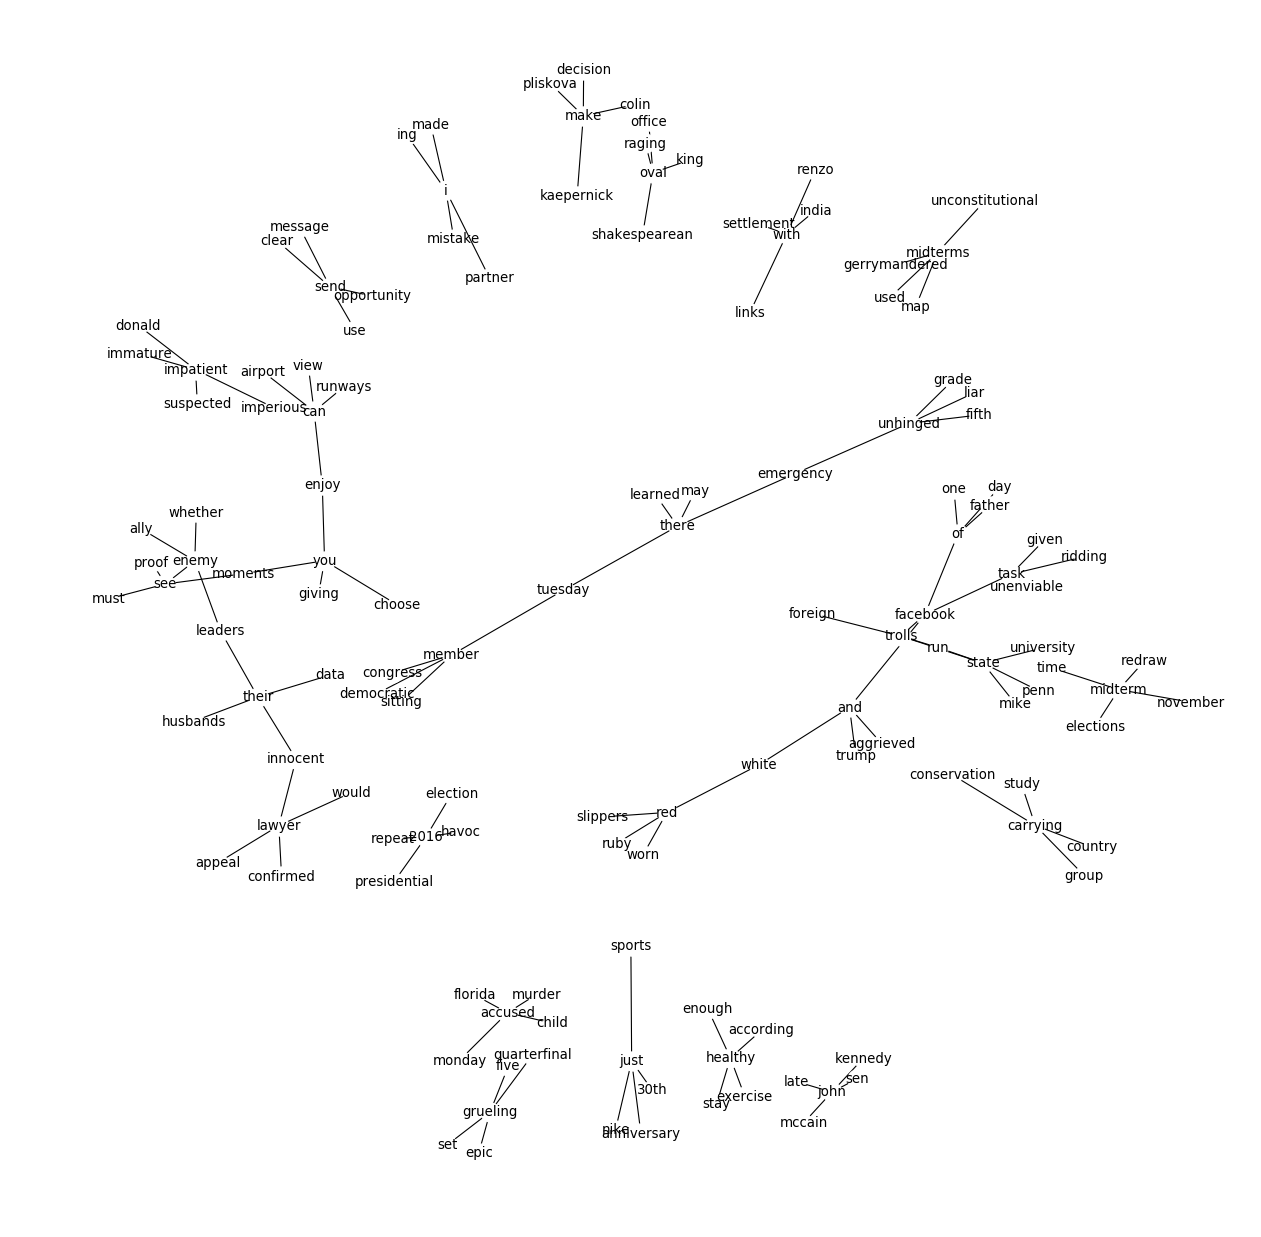

['healthy', 'supreme', 'bids', 'murder', 'dead', 'dad', 'havoc', 'clear', 'miss', 'sitting', 'been', 'parents', 'impatient', 'white', 'karolina', 'fifth', 'several', 'does', 'james', 'brett', 'get', 'election', 'cnn', 'capuano', 'tout', 'holiday', 'made', 'day', 'apparent', 'gone']


In [45]:
import plotly.plotly as py
from plotly.graph_objs import *
import networkx as nx

import matplotlib.pyplot as plt

sample_size = 30

G=nx.Graph()#  G is an empty Graph

random_terms_sample = list(random.sample(corpus_terms, sample_size))
Nodes= random_terms_sample
G.add_nodes_from(Nodes)
Edges= [e for e in edges_related_words_network if e[0] in random_terms_sample]
G.add_edges_from(Edges)

pos = nx.spring_layout(G,k=0.15,iterations=50)

from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')



nx.draw(G, node_color='w',edge_color='k', with_labels=True, pos=pos)


plt.show()

print(list(random.sample(corpus_terms, sample_size)))